# **RFM Analysis: E-commerce UK Retail Dec-2010-Dec-2011**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("EcommerceUKretail.csv", encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [68]:
df.Country.nunique()

38

In [69]:
df = df[df.Country == 'United Kingdom']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 34.0+ MB


In [70]:
df.Quantity.describe()

count    495478.000000
mean          8.605486
std         227.588756
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [71]:
df = df[df['Quantity']>0]
df.Quantity.describe()

count    486286.000000
mean          9.734640
std         163.262428
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [72]:
df.UnitPrice.describe()

count    486286.000000
mean          3.794976
std          41.271159
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [73]:
df = df[df['UnitPrice']>0]
df.UnitPrice.describe()

count    485123.000000
mean          3.849679
std          34.677371
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [74]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     130802
Country             0
dtype: int64

In [75]:
# Count of null values
null_counts = df.isna().sum()

# Percentage of null values
null_percentage = (null_counts / len(df)) * 100

null_summary = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentage})
null_summary

,Null Count,Null Percentage
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,130802,26.962647
Country,0,0.000000


In [76]:
df.dropna(subset=['CustomerID'],how='all',inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [77]:
df['InvoiceDate'].min()

'1/10/2011 10:32'

In [78]:
df['InvoiceDate'].max()

'9/9/2011 9:52'

In [79]:
import datetime as dt
now = dt.date(2011,12,9)

In [80]:
df['date'] = pd.DatetimeIndex(df.InvoiceDate).date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [81]:
df['TotalCost'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [82]:
# Convert InvoiceDate to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract month and create a new column
df['month'] = df['date'].dt.strftime('%Y-%m')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,TotalCost,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12


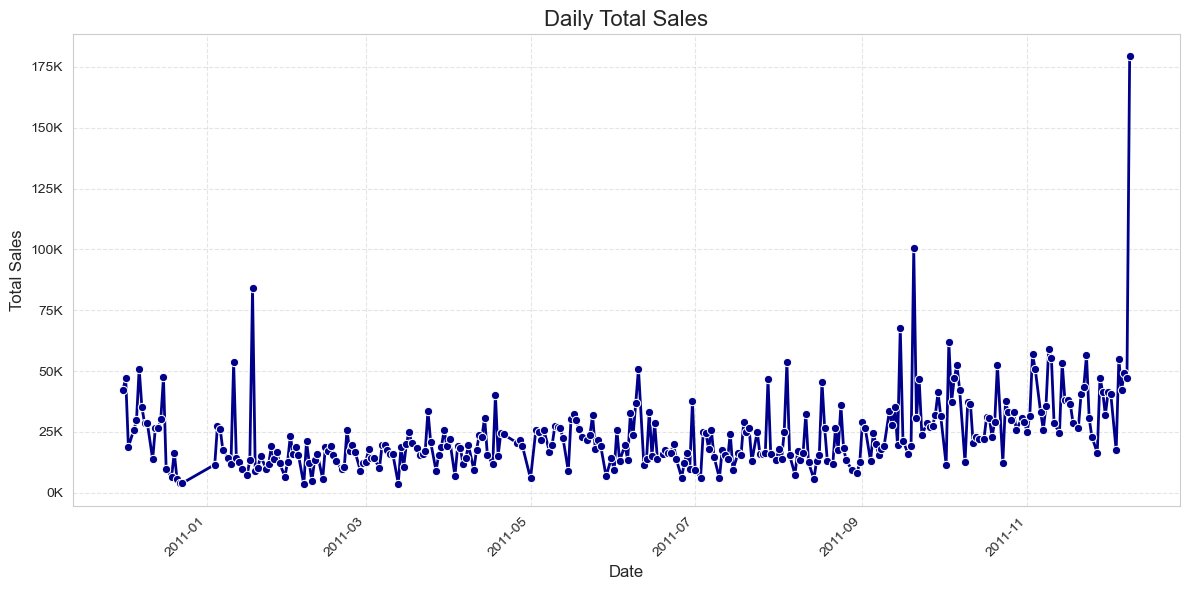

In [83]:
import matplotlib.ticker as ticker

# Calculate the total sales by month
df_date = df.groupby('date').agg({'TotalCost': 'sum'}).reset_index()

# Set the style
sns.set_style("whitegrid")

# Plot the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_date, x='date', y='TotalCost', marker='o', color='darkblue', linewidth=2)
plt.title('Daily Total Sales', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Format y-axis to show values in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()

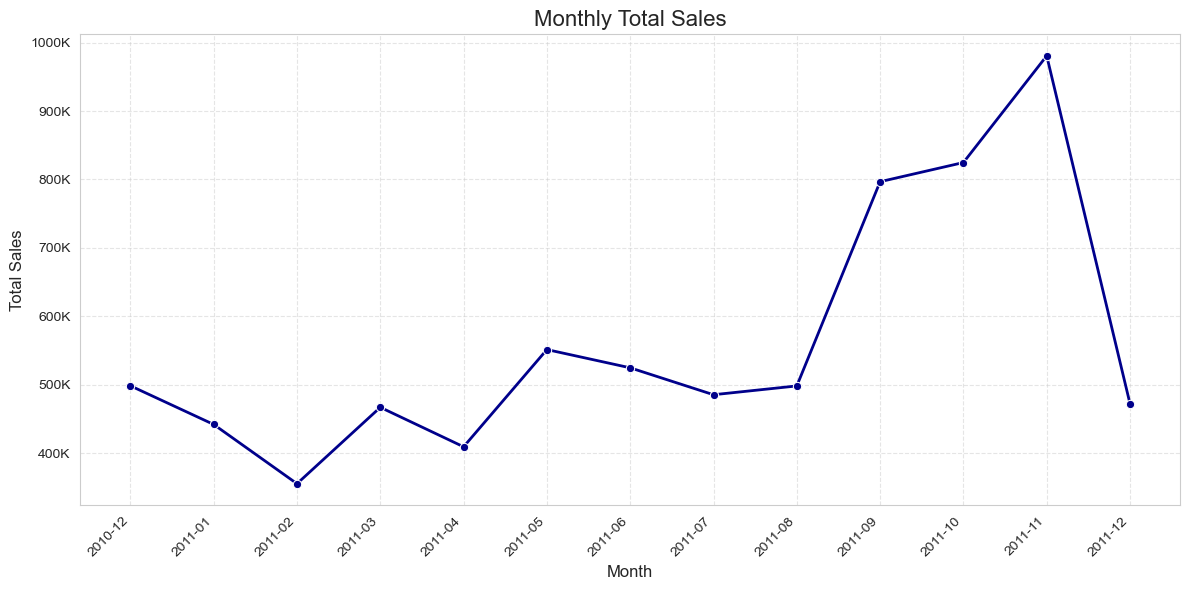

In [84]:
import matplotlib.ticker as ticker

# Calculate the total sales by month
df_month = df.groupby('month').agg({'TotalCost': 'sum'}).reset_index()

# Set the style
sns.set_style("whitegrid")

# Plot the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_month, x='month', y='TotalCost', marker='o', color='darkblue', linewidth=2)
plt.title('Monthly Total Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Format y-axis to show values in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()

In [85]:
recency_df = df.groupby(['CustomerID'],as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [86]:
now = pd.Timestamp(dt.date(2011, 12, 9))
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x: (now - pd.Timestamp(x)).days)
recency_df.drop(columns=['LastPurchaseDate'], inplace=True)
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [87]:
monetary_df=df.groupby('CustomerID',as_index=False)['TotalCost'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [88]:
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,209
3,12749.0,5
4,12820.0,4


In [89]:
#combine first recency and frequency..
rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')

#combibe rf frame with monetary values..
rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')

rfm.set_index('CustomerID',inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,4196.01
12748.0,0,209,33719.73
12749.0,3,5,4090.88
12820.0,3,4,942.34


In [90]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,3920.0,91.742092,99.533485,0.00,17.00,50.00,142.000,373.0
Frequency,3920.0,4.246429,7.199202,1.00,1.00,2.00,5.000,209.0
Monetary,3920.0,1864.385601,7482.817477,3.75,300.28,652.28,1576.585,259657.3


In [91]:
rfm.shape

(3920, 3)

In [92]:
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,5
12747.0,2,11,4196.01,5,5,5
12748.0,0,209,33719.73,5,5,5
12749.0,3,5,4090.88,5,4,5
12820.0,3,4,942.34,5,4,4


In [93]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) + 
                     rfm['FrequencyScore'].astype(str) + 
                     rfm['MonetaryScore'].astype(str))
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12747.0,2,11,4196.01,5,5,5,555
12748.0,0,209,33719.73,5,5,5,555
12749.0,3,5,4090.88,5,4,5,545
12820.0,3,4,942.34,5,4,4,544


In [94]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,115,Hibernating
12747.0,2,11,4196.01,5,5,5,555,Champions
12748.0,0,209,33719.73,5,5,5,555,Champions
12749.0,3,5,4090.88,5,4,5,545,Champions
12820.0,3,4,942.34,5,4,4,544,Champions


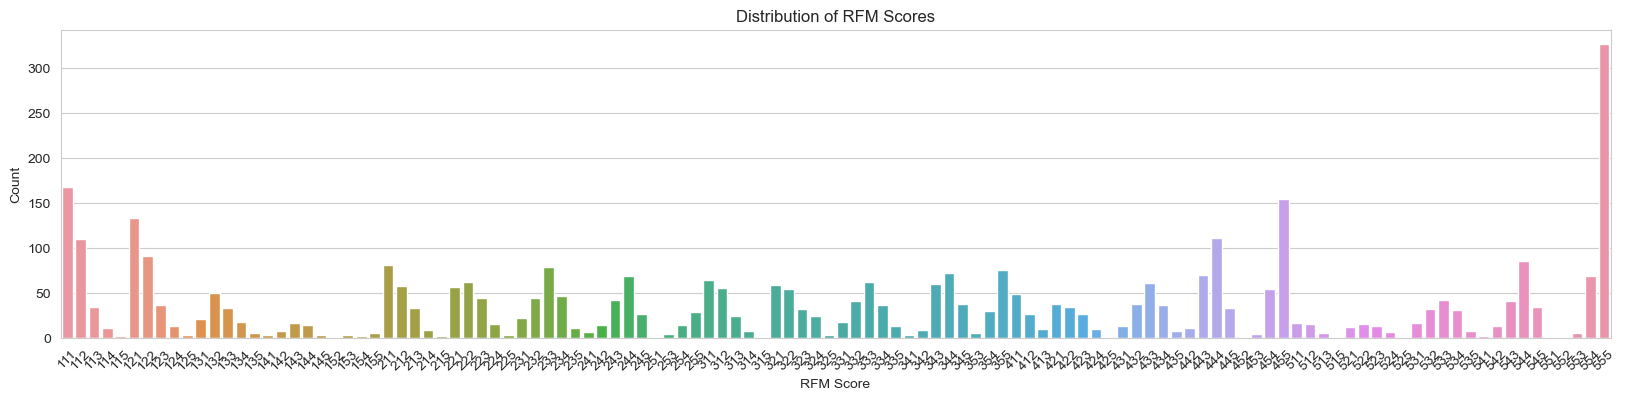

In [95]:
plt.figure(figsize=(20,4))
rfm_level_counts = rfm['RFM_SCORE'].value_counts().sort_index()
sns.barplot(x=rfm_level_counts.index, y=rfm_level_counts.values)
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [96]:
rfm.Segment.value_counts()

Segment
Hibernating            964
Loyal Customers        730
Champions              577
At Risk                532
Potential Loyalists    440
About to Sleep         324
Need Attention         170
Promising               86
Can't Loose             59
New Customers           38
Name: count, dtype: int64

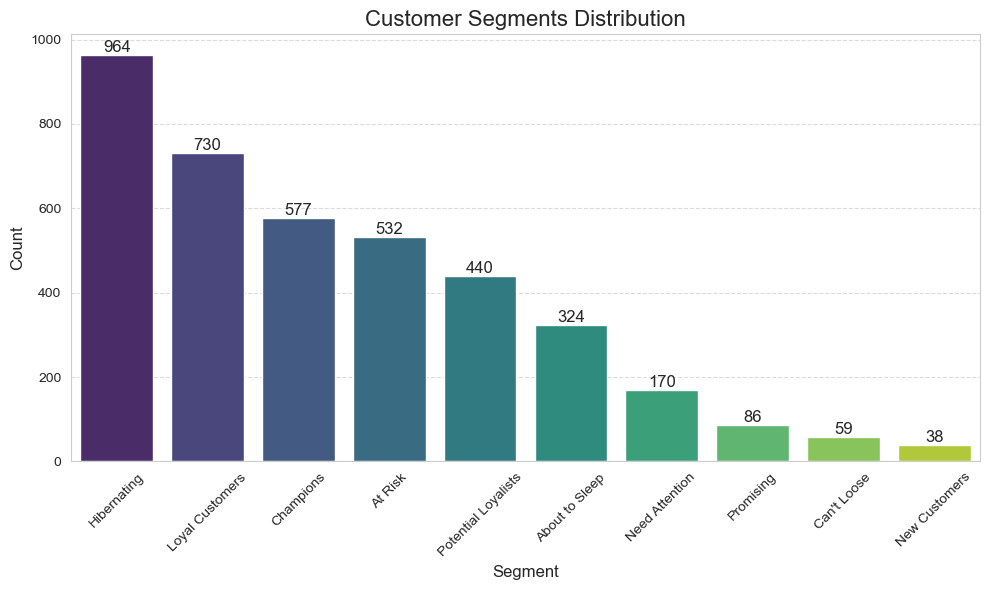

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

segment_counts = rfm.Segment.value_counts()

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')

plt.title('Customer Segments Distribution', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

In [98]:
'''
rfmStats = rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats.columns = rfmStats.columns.map('_'.join).str.strip('|')
rfmStats
'''

'\nrfmStats = rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])\nrfmStats.columns = rfmStats.columns.map(\'_\'.join).str.strip(\'|\')\nrfmStats\n'

In [99]:
rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])

Recency               Frequency               \
                           mean median count       mean median count   
Segment                                                                
About to Sleep        52.493827   52.0   324   1.169753    1.0   324   
At Risk              153.453008  138.0   532   2.898496    3.0   532   
Can't Loose          130.915254  103.0    59   8.542373    7.0    59   
Champions              5.398614    4.0   577  12.232236    8.0   577   
Hibernating          215.940871  218.0   964   1.098548    1.0   964   
Loyal Customers       32.761644   29.0   730   6.424658    5.0   730   
Need Attention        50.852941   50.0   170   2.347059    2.0   170   
New Customers          6.763158    7.5    38   1.000000    1.0    38   
Potential Loyalists   16.359091   17.0   440   2.025000    2.0   440   
Promising             22.813953   23.0    86   1.000000    1.0    86   

                        Monetary                  
                            mean    median count  
Segment                                           
About to Sleep        431.470370   324.685   324  
At Risk              1060.895002   674.485   532  
Can't Loose          2841.441186  2247.510    59  
Champions            6139.733189  2567.060   577  
Hibernating           435.486776   271.545   964  
Loyal Customers      2507.695837  1655.980   730  
Need Attention        834.704529   638.055   170  
New Customers         374.822105   247.700    38  
Potential Loyalists  1055.882795   503.280   440  
Promising             264.759070   213.195    86

## **RFM Analysis Insights**

## **Segment Analysis**